# Defined Terms

## About

During generation of the structured data a provide may wish to 
either use or publish a set of controlled vocabulary terms or 
a similar set.  

Within schema.org this could be done by leveraging the "DefinedTerm" 
amd "DefinedTermSet" types.  

These types allow us both to define a set of terms and 
use a set of terms in describing a thing.

Note that DefinedTerm is an intangible and can connect to most 
types in Schema.org.  So we can use them in places such as:

* CreativeWork -> keyword
* LearningResource -> teaches
* PropertyValue -> valueReference
* LearningResource -> competencyRequired
* CreativeWork -> learningResourceType


```{literalinclude} ./graphs/term.json
:linenos:
```



## Organization in List

```{literalinclude} ./graphs/orglist.json
:linenos:
```

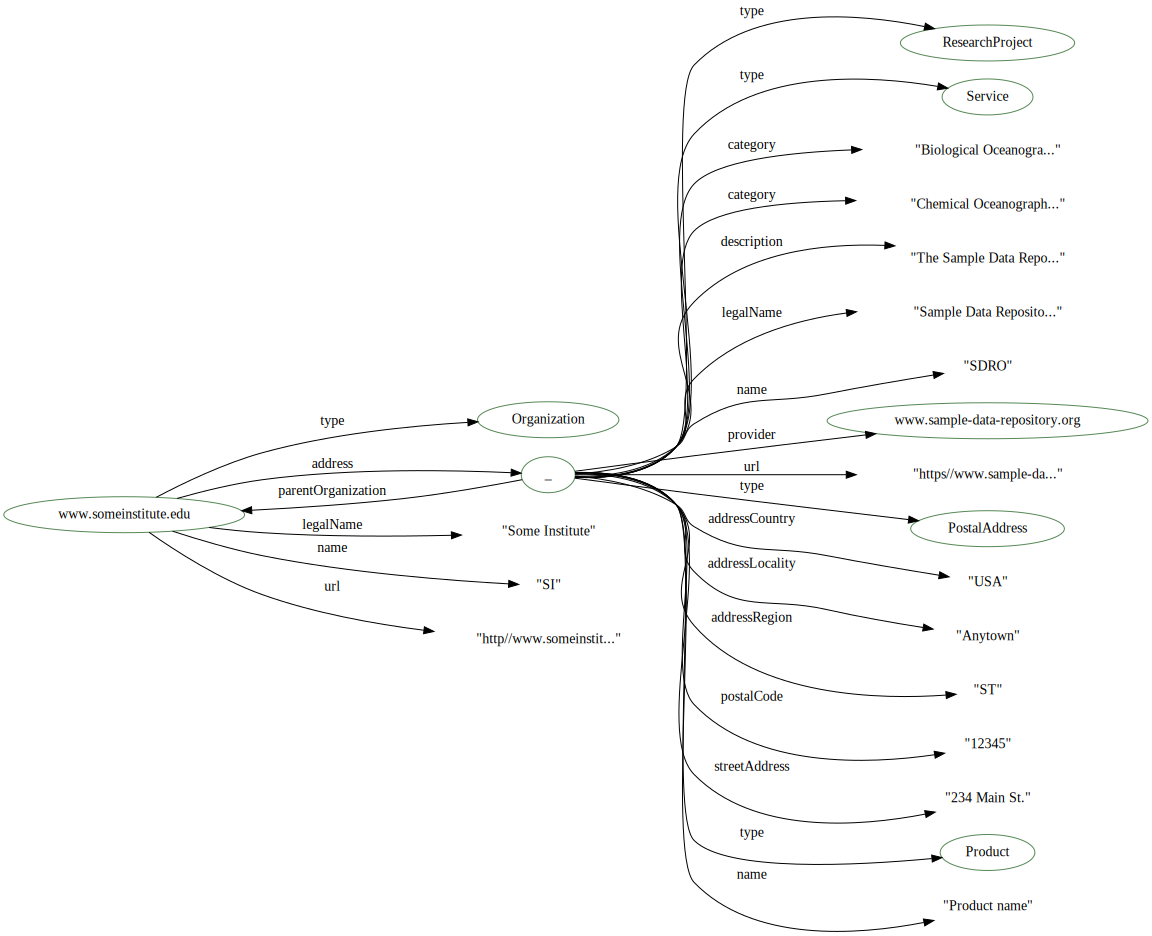

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/orglist.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

## References

* [schema.org/DefinedTerm](https://schema.org/DefinedTerm)
* [schema.org/DefinedTermSet](https://schema.org/DefinedTermSet)